In [27]:
from pandas_datareader import data as stock
#from sklearn.linear_model import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np
import pandas as pd

In [32]:
name_stock="AMZN"
start=datetime.datetime(2020,4,2)
end=datetime.datetime(2020,9,11)

df=stock.DataReader(name=name_stock,data_source="yahoo",start=start,end=end)

df.tail(10)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-28,3433.370117,3386.500000,3423.000000,3401.800049,2897000,3401.800049
2020-08-31,3495.000000,3405.000000,3408.989990,3450.959961,4185900,3450.959961
2020-09-01,3513.870117,3467.000000,3489.580078,3499.120117,3476400,3499.120117
2020-09-02,3552.250000,3486.689941,3547.000000,3531.449951,3931500,3531.449951
2020-09-03,3488.409912,3303.000000,3485.000000,3368.000000,8161100,3368.000000
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800,3294.620117
2020-09-08,3250.850098,3130.000000,3144.000000,3149.840088,6094200,3149.840088
2020-09-09,3303.179932,3185.000000,3202.989990,3268.610107,5188700,3268.610107
2020-09-10,3349.889893,3170.550049,3307.219971,3175.110107,5330700,3175.110107


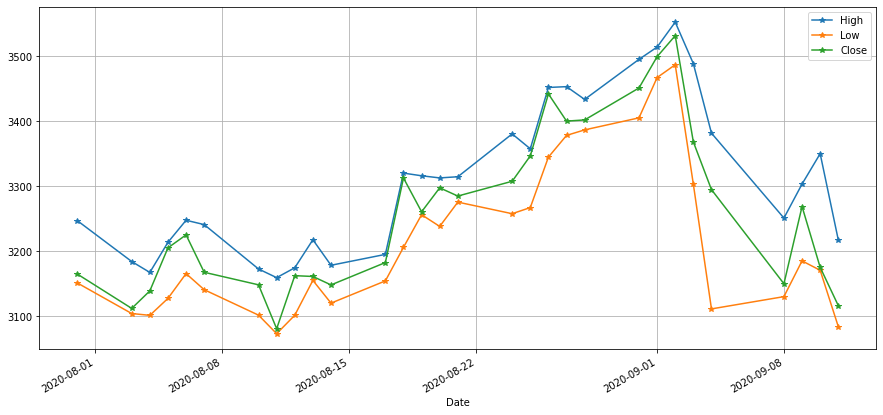

In [33]:
def show_plot_stock(days):
    df[["High","Low","Close"]].tail(days).plot(marker="*",figsize=(15,7),grid=True)
    plt.show()
show_plot_stock(30)

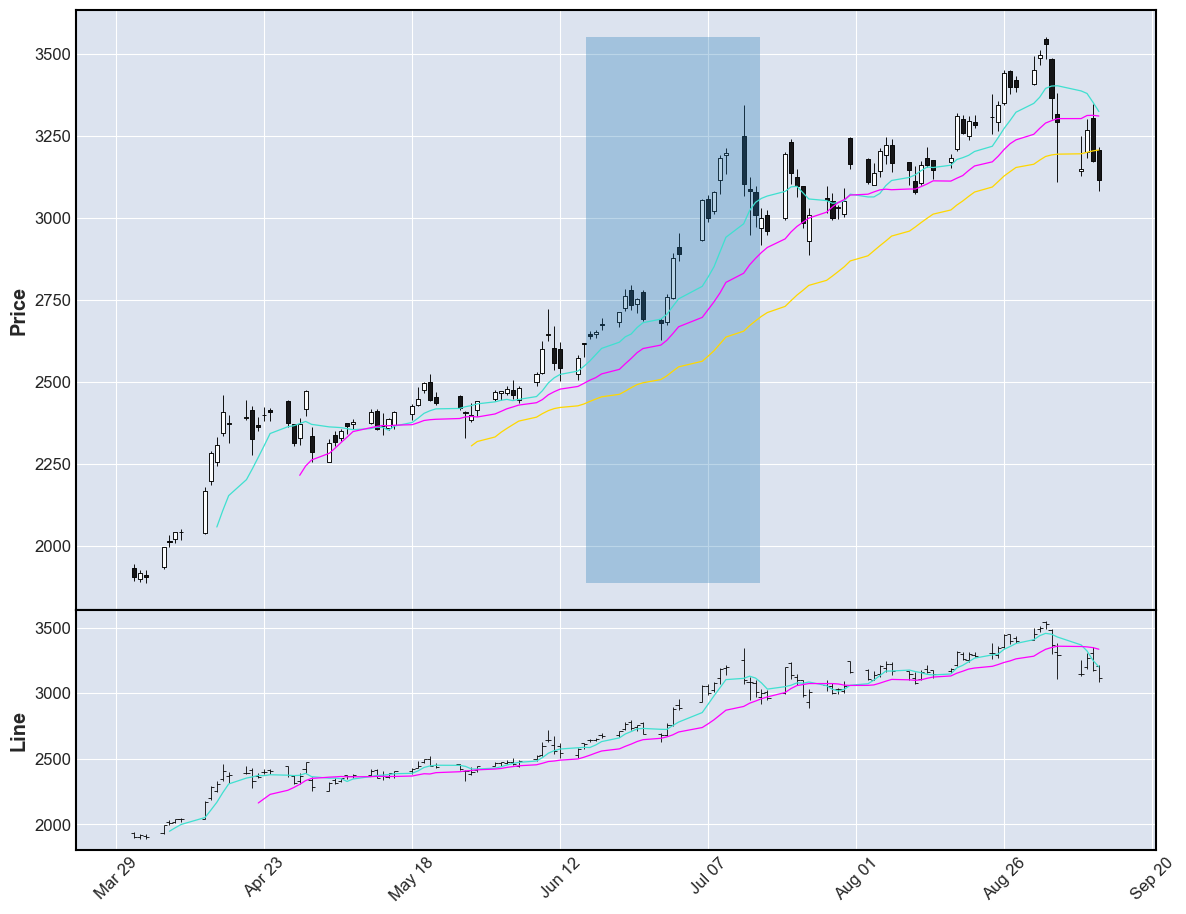

In [34]:
import mplfinance as mpf
ap = mpf.make_addplot(df,panel=1,type='ohlc',ylabel='Line',mav=(5,15))
mpf.plot(df,type='candle',mav=(10,20,40),volume=False, addplot=ap,
         show_nontrading=True,figsize=(15,12),
         vlines=dict(vlines='2020-7-1',linewidths=125,alpha=0.3),
         #hlines=dict(hlines=[27500,28050], linestyle='-.',colors=['g','r']),
         )


In [35]:
def inc_dec(c, o):
    if c > o:
        value="Increase"
    elif c < o:
        value="Decrease"
    else:
        value="Equal"
    return value
def percentage(open,close):
    per=(close-open)/close
    return per*100

df["Status"]=[inc_dec(c,o) for c, o in zip(df.Close,df.Open)]
df["Middle"] = (df.Open+df.Close)/2
df["Height"] = abs(df.Close-df.Open)
df["Percent"]= percentage(df.Open,df.Close)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,Status,Middle,Height,Percent
Date,,,,,,,,,,
2020-08-28,3433.370117,3386.500000,3423.000000,3401.800049,2897000,3401.800049,Decrease,3412.400024,21.199951,-0.623198
2020-08-31,3495.000000,3405.000000,3408.989990,3450.959961,4185900,3450.959961,Increase,3429.974976,41.969971,1.216182
2020-09-01,3513.870117,3467.000000,3489.580078,3499.120117,3476400,3499.120117,Increase,3494.350098,9.540039,0.272641
2020-09-02,3552.250000,3486.689941,3547.000000,3531.449951,3931500,3531.449951,Decrease,3539.224976,15.550049,-0.440330
2020-09-03,3488.409912,3303.000000,3485.000000,3368.000000,8161100,3368.000000,Decrease,3426.500000,117.000000,-3.473872
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800,3294.620117,Decrease,3306.310059,23.379883,-0.709638
2020-09-08,3250.850098,3130.000000,3144.000000,3149.840088,6094200,3149.840088,Increase,3146.920044,5.840088,0.185409
2020-09-09,3303.179932,3185.000000,3202.989990,3268.610107,5188700,3268.610107,Increase,3235.800049,65.620117,2.007585
2020-09-10,3349.889893,3170.550049,3307.219971,3175.110107,5330700,3175.110107,Decrease,3241.165039,132.109863,-4.160796


In [20]:
from bokeh.plotting import figure, show
p = figure(x_axis_type='datetime', width=1000, height=500)
p.title.text = "Candlestick Chart"
#----------------------------------
hours_12=12*60*60*1000
p.segment(df.index, df.High, df.index, df.Low, color="Black")
#tăng
p.rect(df.index[df.Status=="Increase"],df.Middle[df.Status=="Increase"],
   hours_12, df.Height[df.Status=="Increase"],fill_color="#CCFFFF",
   line_color="black")
#giảm
p.rect(df.index[df.Status=="Decrease"],df.Middle[df.Status=="Decrease"],
   hours_12, df.Height[df.Status=="Decrease"],fill_color="#FF3333",
   line_color="black")
show(p)

In [116]:
data=df[["Close"]]
data.tail(10)

,Close
Date,
2020-08-28,28653.869141
2020-08-31,28430.050781
2020-09-01,28645.660156
2020-09-02,29100.500000
2020-09-03,28292.730469
2020-09-04,28133.310547
2020-09-08,27500.890625
2020-09-09,27940.470703
2020-09-10,27534.580078


In [117]:
#Create a variable to predict 'x' days out into the future
future_days = 30
#Create a new column (the target or dependent variable) shifted 'x' units/days up
data['Prediction'] = data.shift(-future_days) # nối value cũ vs 25 values sẽ được dự đoán
#print the data
data.tail(33)

d:\python 3.7.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
Date,,
2020-07-28,26379.279297,27940.470703
2020-07-29,26539.570312,27534.580078
2020-07-30,26313.650391,27665.640625
2020-07-31,26428.320312,NaN
2020-08-03,26664.400391,NaN
2020-08-04,26828.470703,NaN
2020-08-05,27201.519531,NaN
2020-08-06,27386.980469,NaN
2020-08-07,27433.480469,NaN


In [118]:
X = np.array(data.drop(['Prediction'], 1))[:-future_days]
#-----------------------

In [119]:
#Create the target data set and print it.
y = np.array(data['Prediction'])[:-future_days]
print(y)

[23625.33984375 23685.41992188 24597.36914062 24206.859375
 24575.90039062 24474.11914062 24465.16015625 24995.109375
 25548.26953125 25400.640625   25383.109375   25475.01953125
 25742.65039062 26269.890625   26281.8203125  27110.98046875
 27572.43945312 27272.30078125 26989.99023438 25128.16992188
 25605.5390625  25763.16015625 26289.98046875 26119.609375
 26080.09960938 25871.4609375  26024.9609375  26156.09960938
 25445.93945312 25745.59960938 25015.55078125 25595.80078125
 25812.88085938 25734.97070312 25827.359375   26287.02929688
 25890.1796875  26067.27929688 25706.08984375 26075.30078125
 26085.80078125 26642.58984375 26870.09960938 26734.7109375
 26671.94921875 26680.86914062 26840.40039062 27005.83984375
 26652.33007812 26469.890625   26584.76953125 26379.27929688
 26539.5703125  26313.65039062 26428.3203125  26664.40039062
 26828.47070312 27201.51953125 27386.98046875 27433.48046875
 27791.43945312 27686.91015625 27976.83984375 27896.72070312
 27931.01953125 27844.91015625 

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [121]:
# X_future will save all values that use for predicting
x_future = data.drop(['Prediction'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[26080.09960938],
       [25871.4609375 ],
       [26024.9609375 ],
       [26156.09960938],
       [25445.93945312],
       [25745.59960938],
       [25015.55078125],
       [25595.80078125],
       [25812.88085938],
       [25734.97070312],
       [25827.359375  ],
       [26287.02929688],
       [25890.1796875 ],
       [26067.27929688],
       [25706.08984375],
       [26075.30078125],
       [26085.80078125],
       [26642.58984375],
       [26870.09960938],
       [26734.7109375 ],
       [26671.94921875],
       [26680.86914062],
       [26840.40039062],
       [27005.83984375],
       [26652.33007812],
       [26469.890625  ],
       [26584.76953125],
       [26379.27929688],
       [26539.5703125 ],
       [26313.65039062]])

In [122]:

def create_valid(model):
    predictions=model.predict(x_future)
    valid =  data[X.shape[0]:]
    valid['Predictions'] = predictions #Create a new column called
    return valid
valid=create_valid(lr)
valid

d:\python 3.7.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction,Predictions
Date,,,
2020-07-31,26428.320312,NaN,27314.815387
2020-08-03,26664.400391,NaN,27177.365796
2020-08-04,26828.470703,NaN,27278.490444
2020-08-05,27201.519531,NaN,27364.883617
2020-08-06,27386.980469,NaN,26897.035437
2020-08-07,27433.480469,NaN,27094.449298
2020-08-10,27791.439453,NaN,26613.498610
2020-08-11,27686.910156,NaN,26995.762955
2020-08-12,27976.839844,NaN,27138.773681


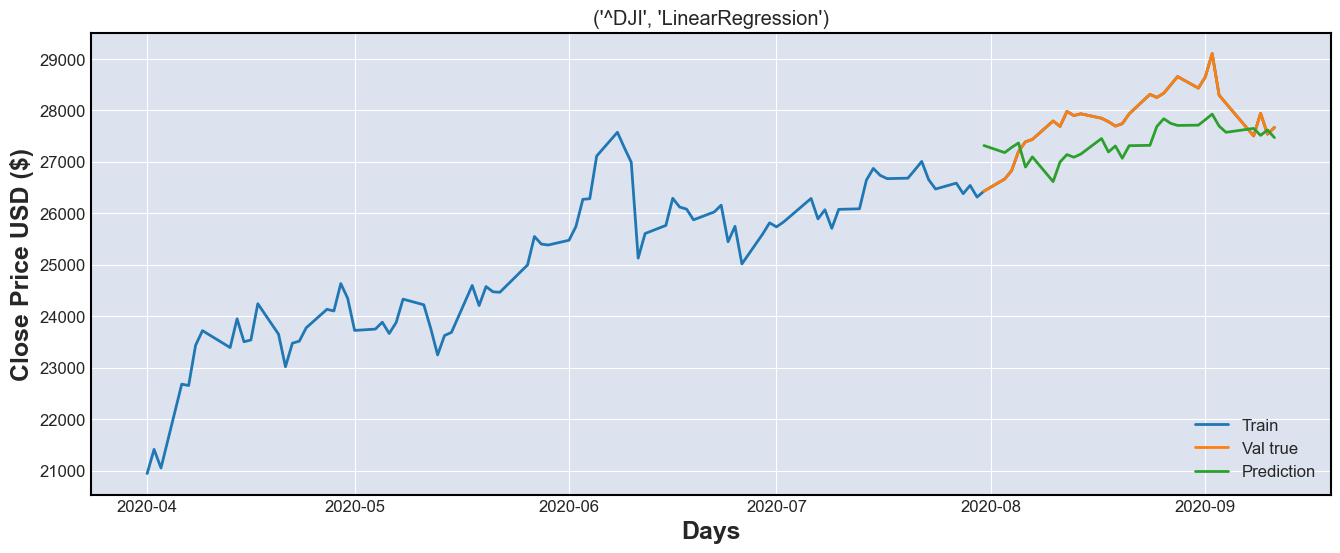

In [123]:
def visualization_model(valids,model):
    plt.figure(figsize=(16,6))
    plt.title((name_stock,model))
    plt.xlabel('Days',fontsize=18)
    plt.ylabel('Close Price USD ($)',fontsize=18)
    plt.plot(data['Close'])
    plt.plot(valids[['Close','Predictions']])
    plt.legend(['Train', 'Val true', 'Prediction' ], loc='lower right')
    plt.grid(True)
    plt.show()

visualization_model(valid,"LinearRegression")

d:\python 3.7.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


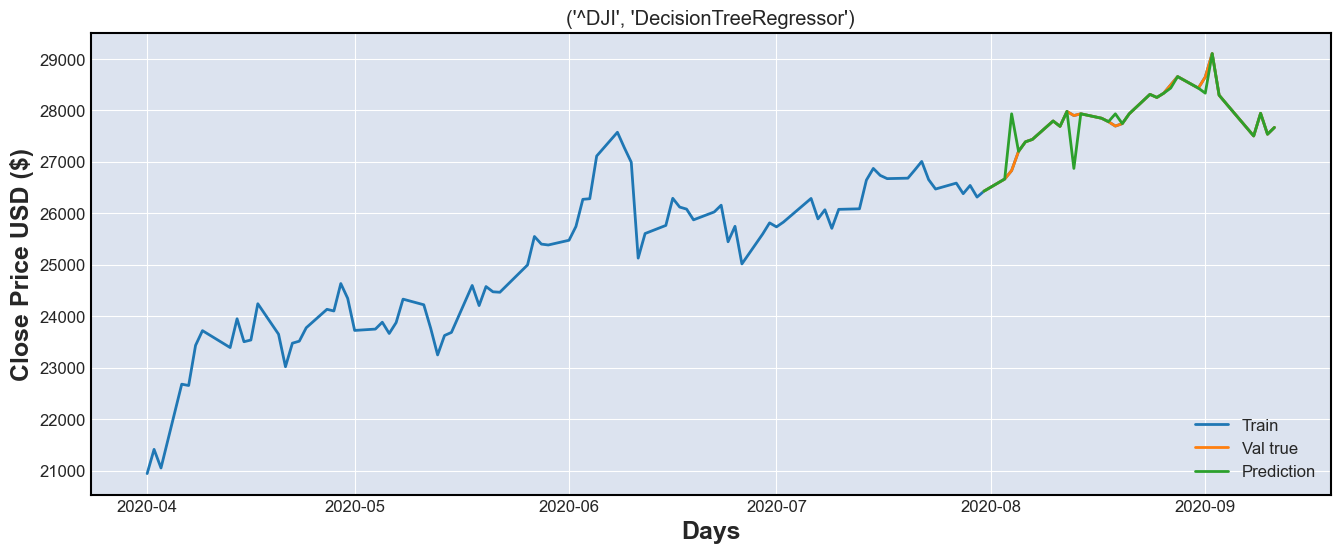

[26680.86914062 27005.83984375 27005.83984375 27005.83984375
 26840.40039062 26840.40039062 26840.40039062]


In [134]:
from sklearn.tree import DecisionTreeRegressor
#--------------using model DecisionTreeRegressor-------------
tree = DecisionTreeRegressor().fit(x_train, y_train)
Dtree_valid=create_valid(tree)
visualization_model(Dtree_valid,"DecisionTreeRegressor")
#---------------------predict price stock--------------------
arr_future=[["27100"],["27200"],["27300"],["27400"],["27500"],["27600"],["27700"]]
print(tree.predict(arr_future))

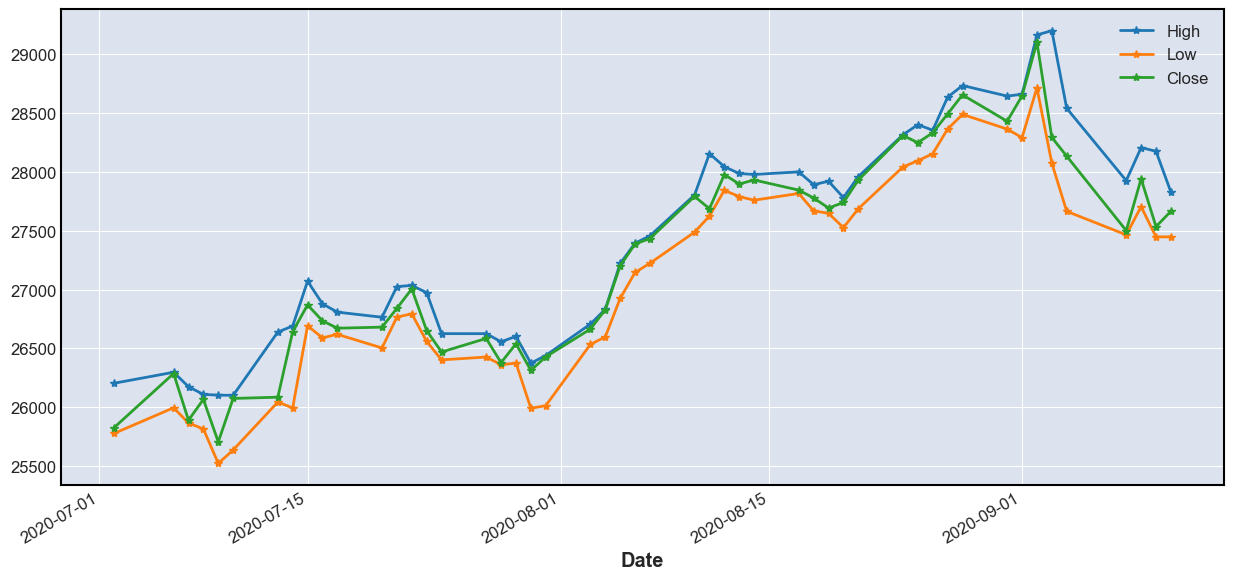

In [135]:
show_plot_stock(50)

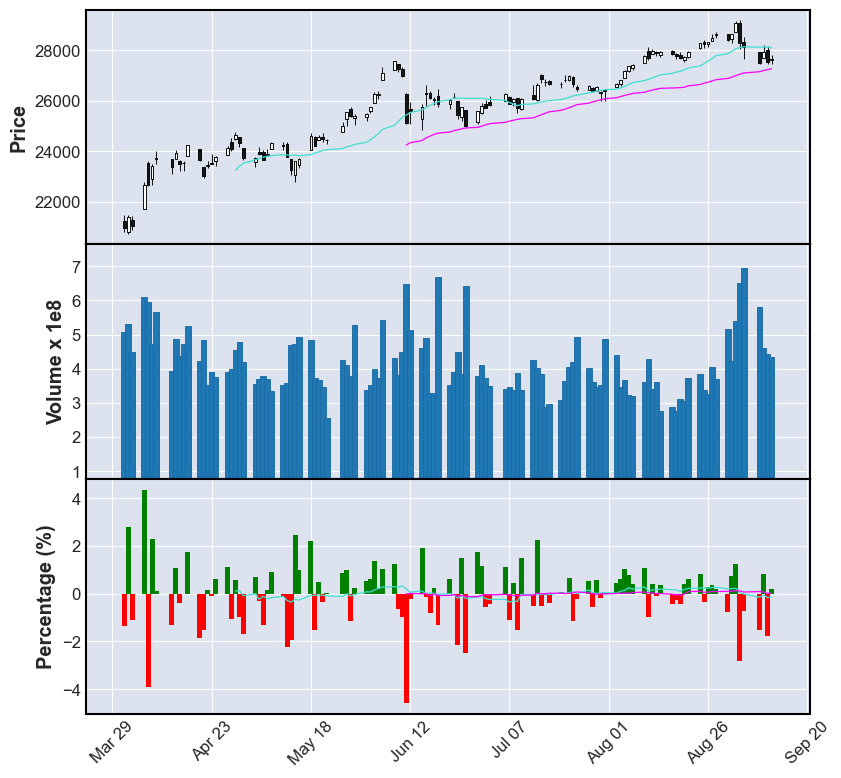

In [110]:
def get_color(percent):
    color=[]
    for per in percent:
        if(per>0):
            color.append('g')
        else:
            color.append('r')
    return color

apds = [ 
         mpf.make_addplot((df['Percent']),panel=2,color=get_color(df.Percent),type='bar', width=1.25,mav=(20,50),ylabel="Percentage (%)")
       ]

mpf.plot(df,addplot=apds,panel_ratios=(1,1),figratio=(1,1),figscale=1.75,type="candle",
         volume=True, mav=(20,50),show_nontrading=True)

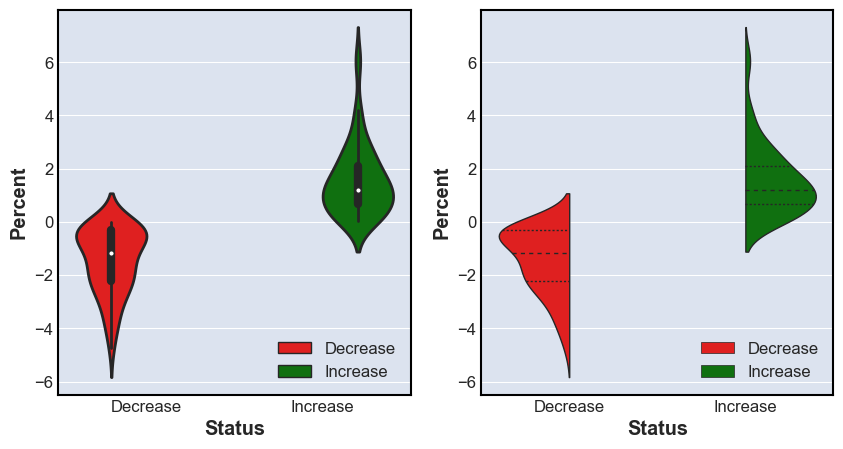

In [39]:
percent=df.Percent
plt.figure(figsize=(10,5))
#----------------------------
plt.subplot(1,2,1)
plt.xlabel("Percent of price close")
plt.ylabel("% Percent")
sns.violinplot(data=df,hue="Status",x="Status",y="Percent",
              palette={"Decrease": "r", "Increase": "g"})
plt.legend(loc="lower right")
#----------------------------------
plt.subplot(1,2,2)
plt.xlabel("Price")
plt.ylabel("$ Price close")
sns.violinplot(data=df, x="Status", y="Percent", hue="Status",
               split=True, inner="quart", linewidth=1,
               palette={"Decrease": "r", "Increase": "g"})
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:>

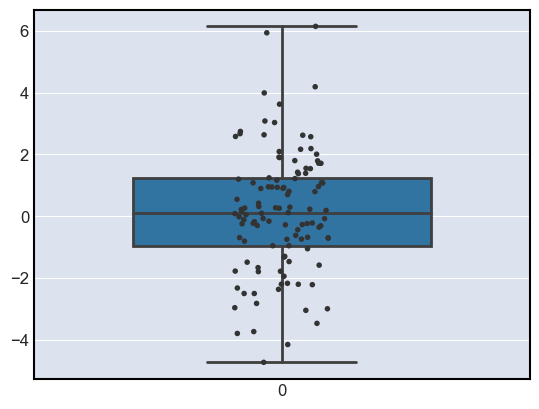

In [37]:
sns.boxplot(data=percent,whis=[0, 100], width=.6)

# Add in points to show each observation
sns.stripplot(data=percent,
              size=4, color=".2", linewidth=0,
             )
